Happy Norooz:))                                                                                      
in this homework you're going to manipulate the Data Science world Data base whick we are talking about in the class.
after ploting you should also explain briefly about your outputs.

first import libraries you need for this work.

In [1]:
# importing libraries
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from pandas import DataFrame

now you can import data from the main_dataset

In [2]:
url = 'https://raw.githubusercontent.com/SBUDataAnalysis/hw4-saraghl/main/multipleChoiceResponses.csv'
response = pd.read_csv(url, encoding='latin-1')

/usr/local/lib/python3.7/dist-packages/IPython/core/interactiveshell.py:2882: DtypeWarning: Columns (31,83,86,87,98,99,109,116,123,124,127,129,130,164) have mixed types.Specify dtype option on import or set low_memory=False.
  exec(code_obj, self.user_global_ns, self.user_ns)


In [3]:
response.head()

,GenderSelect,Country,Age,EmploymentStatus,StudentStatus,LearningDataScience,CodeWriter,CareerSwitcher,CurrentJobTitleSelect,TitleFit,...,JobFactorExperienceLevel,JobFactorDepartment,JobFactorTitle,JobFactorCompanyFunding,JobFactorImpact,JobFactorRemote,JobFactorIndustry,JobFactorLeaderReputation,JobFactorDiversity,JobFactorPublishingOpportunity
0,"Non-binary, genderqueer, or gender non-conforming",NaN,NaN,Employed full-time,NaN,NaN,Yes,NaN,DBA/Database Engineer,Fine,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,Female,United States,30.0,"Not employed, but looking for work",NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Somewhat important,NaN,NaN
2,Male,Canada,28.0,"Not employed, but looking for work",NaN,NaN,NaN,NaN,NaN,NaN,...,Very Important,Very Important,Very Important,Very Important,Very Important,Very Important,Very Important,Very Important,Very Important,Very Important
3,Male,United States,56.0,"Independent contractor, freelancer, or self-em...",NaN,NaN,Yes,NaN,Operations Research Practitioner,Poorly,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,Male,Taiwan,38.0,Employed full-time,NaN,NaN,Yes,NaN,Computer Scientist,Fine,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


to begin you jorney we begin with some finding some information in this dataframe:                   
1.find the total number of respondents                                                               
2.find the total number of countries with respomdents                                                
3.find Country with highest respondents                                                               
4.find the youngest and oldest respondent in this survey

In [4]:
 # part 1
 respondents_num = response.shape[0]
 print('the total number of respondents:',respondents_num)

#part 2
country_num = response['Country'].nunique()
print('total number of countries with respondents:', country_num)

#part 3
highest = response['Country'].value_counts().idxmax()
print('the country with highest respondents:',highest)

#part 4
old = response['Age'].max()
young = response['Age'].min()
print('the youngest respondent: ',young)
print('the oldest respondent: ',old)

the total number of respondents: 16716
total number of countries with respondents: 52
the country with highest respondents: United States
the youngest respondent:  0.0
the oldest respondent:  100.0


<h1>Gender Split</h1>
in this part you should seprate people by their gender and see each gender's quota in this survey 

GenderSelect
A different identity                                   159
Female                                                2778
Male                                                 13610
Non-binary, genderqueer, or gender non-conforming       74
dtype: int64


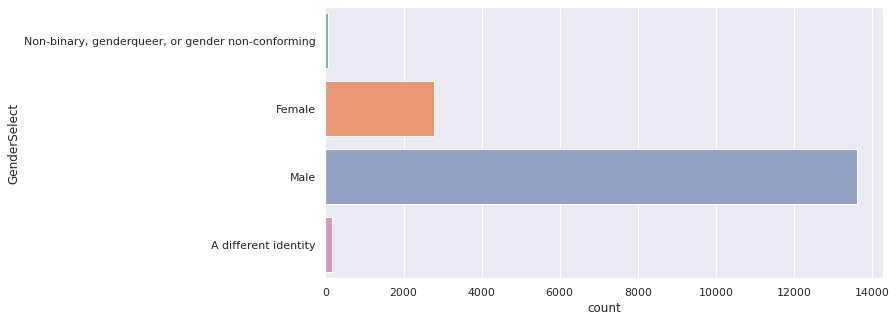

In [5]:
gender = response.groupby('GenderSelect').size()
print(gender)
sns.set_theme()


fig=plt.figure(figsize=(10,5))
sns.countplot(y ='GenderSelect',data = response, palette="Set2" )
plt.show()

it's obvious from the above plot that men are at the top by a large difference compared to the other groups, the second place is for the number of women. Other genders are also present in the survey but they are in the minority.

# Respondents By Country
in this part you should sort Countries with most respondents and plot first 15. then plot those Countries( your plot should be something like below) you should use Country column in dataset.

In [6]:
countries = pd.DataFrame(response['Country'].value_counts())
first15 = countries.iloc[0:15]
print(first15)

                             Country
United States                   4197
India                           2704
Other                           1023
Russia                           578
United Kingdom                   535
People 's Republic of China      471
Brazil                           465
Germany                          460
France                           442
Canada                           440
Australia                        421
Spain                            320
Japan                            277
Taiwan                           254
Italy                            238


/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


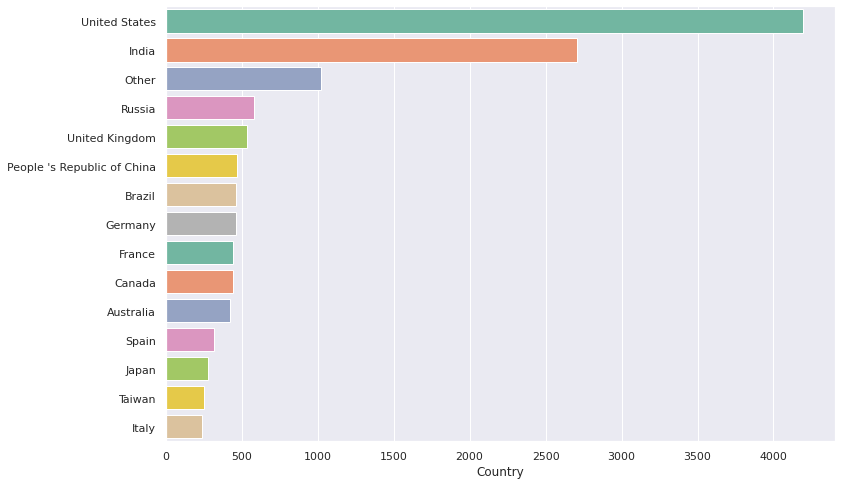

In [7]:
fig=plt.figure(figsize=(12,8))
country_plt = response['Country'].value_counts()[0:15].to_frame()
sns.barplot(country_plt['Country'], country_plt.index, palette = 'Set2')
plt.show()

<h1> Compensation</h1>
Data Scientists are one of the most highest payed indviduals. Lets check what the surveyors say. you should use both main data set and Conversion rates data set for this task. you should also clean the data.

In [8]:
#reading the conversion rates data set
url2 = 'https://raw.githubusercontent.com/SBUDataAnalysis/hw4-saraghl/main/conversionRates.csv'
data = pd.read_csv(url2)
data.describe()

,Unnamed: 0,exchangeRate
count,86.000000,86.000000
mean,43.500000,0.281922
std,24.969982,0.498894
min,1.000000,0.000030
25%,22.250000,0.009179
50%,43.500000,0.057550
75%,64.750000,0.282506
max,86.000000,2.652053


according to this part and the following parts, we need to know the salary dependence on the country, gender, and current job title. so after cleaning the data, we will make a salary table that includes this information.

In [9]:
#cleaning data
response['CompensationAmount'] = response['CompensationAmount'].str.replace('-','')
response['CompensationAmount'] = response['CompensationAmount'].str.replace(',','')
data.drop('Unnamed: 0', inplace = True, axis = 1)
data

,originCountry,exchangeRate
0,USD,1.000000
1,EUR,1.195826
2,INR,0.015620
3,GBP,1.324188
4,BRL,0.321350
...,...,...
81,SVC,0.114124
82,SZL,0.077002
83,UYU,0.034642
84,XAF,0.001823


In [10]:
salary = response[['CompensationAmount','CompensationCurrency','Country','GenderSelect','CurrentJobTitleSelect']].dropna()  # Drop the rows where at least one element is missing.
salary = salary.merge(data,left_on= 'CompensationCurrency', right_on = 'originCountry') 
# left_on : Column or index level names to join on in the left DataFrame
# right_on : Column or index level names to join on in the right DataFrame
salary['final income'] = pd.to_numeric(salary['CompensationAmount']) * salary['exchangeRate']
# we used pd.to_numeric cause python can't multiply sequence by non-int of type 'float'
salary.head()

,CompensationAmount,CompensationCurrency,Country,GenderSelect,CurrentJobTitleSelect,originCountry,exchangeRate,final income
0,250000,USD,United States,Male,Operations Research Practitioner,USD,1.0,250000.0
1,20000,USD,United States,Male,Researcher,USD,1.0,20000.0
2,100000,USD,United States,Male,Scientist/Researcher,USD,1.0,100000.0
3,133000,USD,United States,Male,Engineer,USD,1.0,133000.0
4,80000,USD,Sweden,Male,Machine Learning Engineer,USD,1.0,80000.0


In [11]:
max = salary['final income'].max()
min = salary['final income'].min()
print(max, min)

28297400000.0 0.0


above numbers don't sound reasonable so we assign a logical minimum and maximum for the final income.


In [12]:
salary=salary[salary['final income']< 2000000]
salary=salary[salary['final income']> 10000]
print('minimum salary is :', salary['final income'].min())
print('maximum salary is :', salary['final income'].max())
print('the average salary is :', salary['final income'].median())

minimum salary is : 10119.744
maximum salary is : 1059875.0
the average salary is : 65000.0


in the next part find the pdf of salaries

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


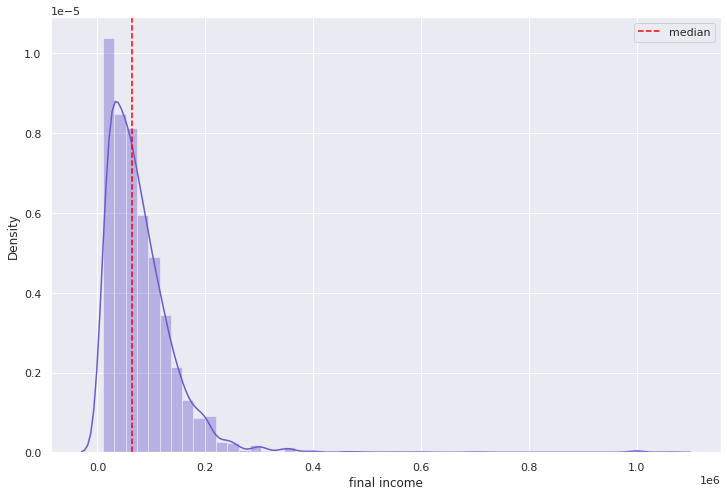

In [13]:
plt.subplots(figsize=(12,8))
sns.distplot(salary['final income'], kde = True, color = 'slateblue')
plt.axvline(salary['final income'].median(), linestyle='dashed', color = 'red', label = 'median')
plt.legend(loc = 'upper right')
plt.show()

As you can see from the chart above, the average salary of a data scientist is around $ 80,000, which I think is a good salary. Therefore, it can be concluded that the data also confirm this issue.


# Compensation by Country
an interesting question that comes to mind is how salaries change according to countries so for this task find first 15 countries with maximum salaries and also find 
median salaries for the countries with most respondents.

In [14]:
group_c = salary.groupby('Country')['final income'].median().sort_values(ascending=False)[:15].to_frame() 
# group the salary by countries and sort the values of final income in each country from increasing to decreasing
print(group_c)

                final income
Country                     
United States    110000.0000
Switzerland      104338.2000
Australia         96277.2000
Norway            87875.4000
Sweden            81382.6000
Denmark           80365.0000
Netherlands       77130.7770
Israel            75000.0000
Germany           71749.5600
Canada            70013.4800
Ireland           66667.2995
United Kingdom    66209.4000
Japan             63756.0000
Singapore         63120.0650
New Zealand       61863.0850


/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


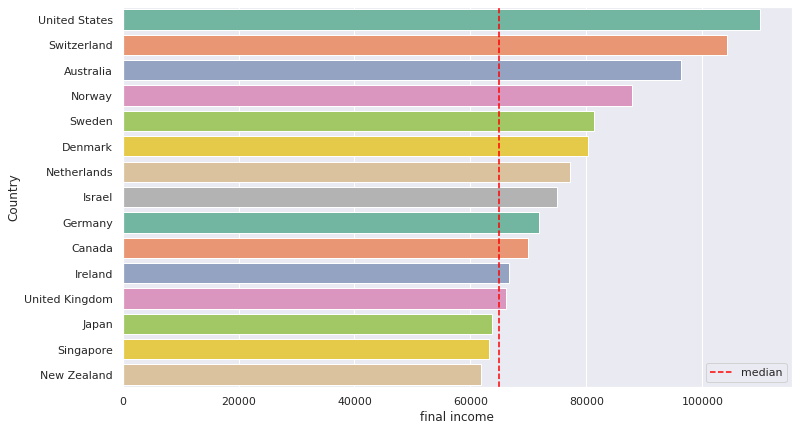

In [15]:
fig=plt.figure(figsize=(12,7))
sns.barplot('final income', group_c.index ,data = group_c, palette='Set2')
plt.axvline(salary['final income'].median(), linestyle='dashed', color = 'red', label = 'median')
plt.legend(loc = 'lower right')
plt.show()

so we can conclude that United States is the best country for data scientists.

# Salary By Gender
we know that today there are lots of people out there who wants equality in payment system for all genders, so here in this part show if there is a gap between gender's salary or not.

In [16]:
group_g = salary.groupby('GenderSelect')['final income'].median().sort_values(ascending=False)[:15].to_frame() 
# group the salary by gender and sort the values of final income in each country from increasing to decreasing
print(group_g)

                                                   final income
GenderSelect                                                   
A different identity                                  78402.396
Male                                                  65476.895
Female                                                62000.000
Non-binary, genderqueer, or gender non-conforming     47773.904


/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


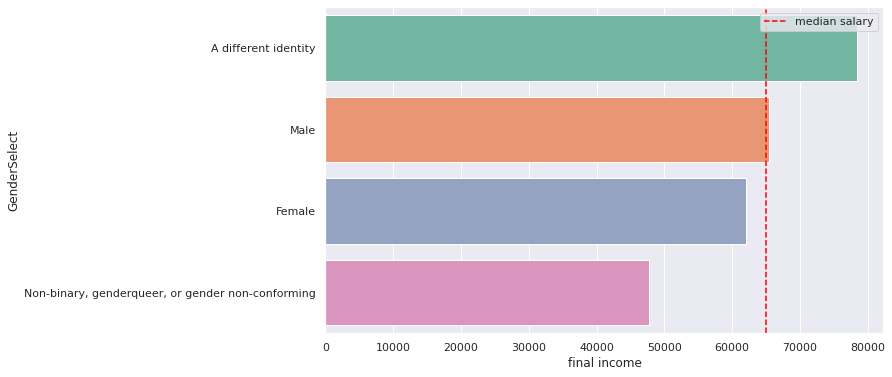

In [17]:
fig = plt.figure(figsize=(10,6))
sns.barplot('final income', group_g.index,data = group_g, palette='Set2')
plt.axvline(salary['final income'].median(), linestyle='dashed', color = 'red', label = 'median salary')
plt.legend(loc = 'upper right')
plt.show()

As can be seen from the graph, equality between men and women is almost equal. But this chart shows that the salaries of LGBTQ members are much lower and there is no justice in this issue.

# Age
check the age of all respondents and plot the pdf of ages.

In [18]:
response['Age'].describe()

count    16385.000000
mean        32.372841
std         10.473487
min          0.000000
25%         25.000000
50%         30.000000
75%         37.000000
max        100.000000
Name: Age, dtype: float64

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


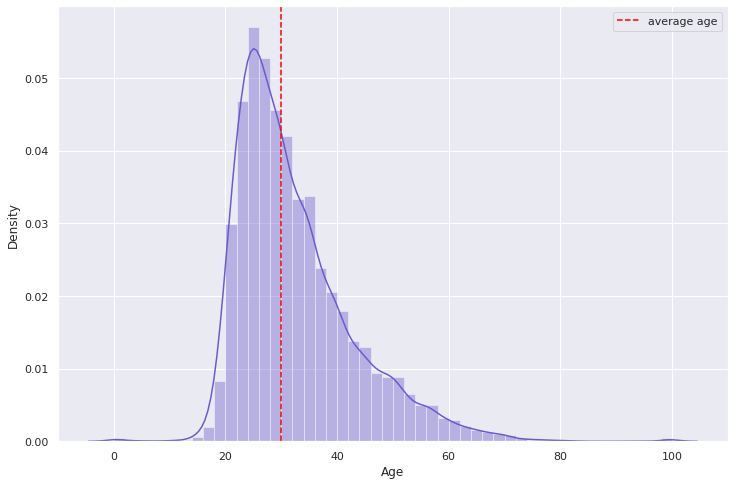

In [19]:
plt.subplots(figsize=(12,8))
sns.distplot(response['Age'],kde = True,color = 'slateblue')
plt.axvline(response['Age'].median(), linestyle='dashed', color = 'red', label = 'average age')
plt.legend(loc = 'upper right')
plt.show()

it seems that most of the data scientists are near age 30 and There are a small number of people that can have this occupation in their middle age.

# Profession & Major
as you know for entering to the world of data you should know some important skills like how to code or deal with databases or being familiar with algorithms for efficient computation or high performance computing and etc.
so first find the which majors have most respondents.

In [20]:
major = response.groupby('MajorSelect').size()
print(major.sort_values(ascending=False))

MajorSelect
Computer Science                                                4397
Mathematics or statistics                                       2220
Engineering (non-computer focused)                              1339
Electrical Engineering                                          1303
Other                                                            848
Physics                                                          830
Information technology, networking, or system administration     693
A social science                                                 531
Biology                                                          274
Management information systems                                   237
A humanities discipline                                          198
A health science                                                 152
Psychology                                                       137
I never declared a major                                          65
Fine arts or performin

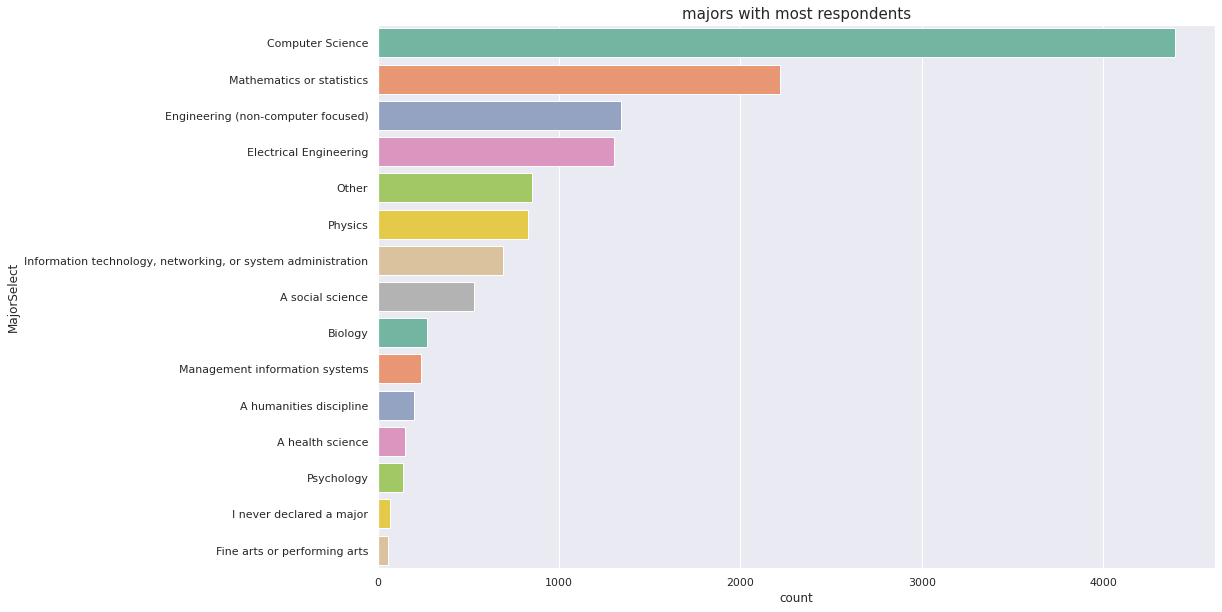

In [21]:
fig=plt.figure(figsize=(15,10))
sns.countplot(y ='MajorSelect',data = response, palette="Set2",order = response['MajorSelect'].value_counts().index)
plt.title('majors with most respondents', size =15)
plt.show()

computer science and then mathematics or statics are the best major in order to enter to the world of data science.

# Compensation By Job Title
in this dataset we have both job and salary columns ('CurrentJobTitleSelect' , 'Salary' ) so sort those Jobs based on the salary and plot them.

In [22]:
group_j = salary.groupby('CurrentJobTitleSelect')['final income'].median().sort_values(ascending=False).to_frame() 
# group the salary by job title and sort the values of final income in each country from increasing to decreasing
print(group_j)

                                      final income
CurrentJobTitleSelect                             
Operations Research Practitioner        106921.280
Data Scientist                           80000.000
Other                                    80000.000
Predictive Modeler                       78589.985
Engineer                                 74988.000
Software Developer/Software Engineer     66209.400
DBA/Database Engineer                    65000.000
Machine Learning Engineer                58224.080
Business Analyst                         57658.160
Statistician                             56203.822
Data Analyst                             55220.720
Computer Scientist                       53808.172
Data Miner                               52150.150
Scientist/Researcher                     51594.666
Researcher                               46000.000
Programmer                               36967.015


/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


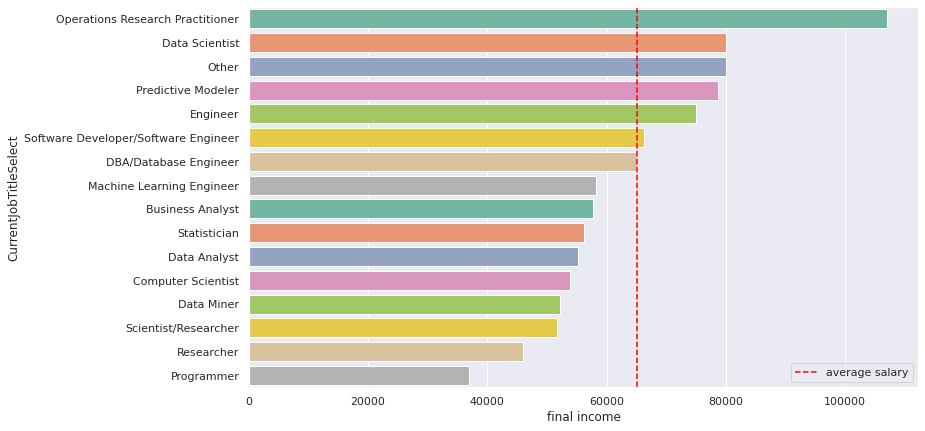

In [23]:
fig=plt.figure(figsize=(12,7))
sns.barplot('final income', group_j.index ,data = group_j, palette='Set2')
plt.axvline(salary['final income'].median(), linestyle='dashed', color = 'red', label = 'average salary')
plt.legend(loc = 'lower right')
plt.show()

operation research practitioners have the highest salary which is much higher than theaverage salary and programmers have the lowest salaries.

# Machine learning tools and methods
people in this work use machine learning to develope and predict and gain some useful information from datasets. there are columns like 'MLSkillsSelect' and 'ML Techniques used' in this dataset that have some information about the respondent's sight to ML. what you can find from these infos.

In [24]:
response['MLSkillsSelect'].head()

0    Computer Vision,Natural Language Processing,Su...
1    Computer Vision,Supervised Machine Learning (T...
2    Adversarial Learning,Computer Vision,Natural L...
3    Recommendation Engines,Reinforcement learning,...
4    Computer Vision,Outlier detection (e.g. Fraud ...
Name: MLSkillsSelect, dtype: object

In [63]:
# cleaning data
skills = response['MLSkillsSelect'].str.split(',').dropna()
skill_list = []
for skill in skills :
  skill_list.extend(skill) # adding all of the elements in skills to the list skill_list


In [26]:
group_skill = pd.Series(skill_list).value_counts()
print(group_skill)

Supervised Machine Learning (Tabular Data)        8188
Unsupervised Learning                             4389
Time Series                                       4250
Natural Language Processing                       3163
Outlier detection (e.g. Fraud detection)          2621
Computer Vision                                   2564
Recommendation Engines                            2305
Survival Analysis                                 1313
Reinforcement learning                            1074
Other (please specify; separate by semi-colon)     782
Adversarial Learning                               600
Speech Recognition                                 550
Machine Translation                                449
dtype: int64


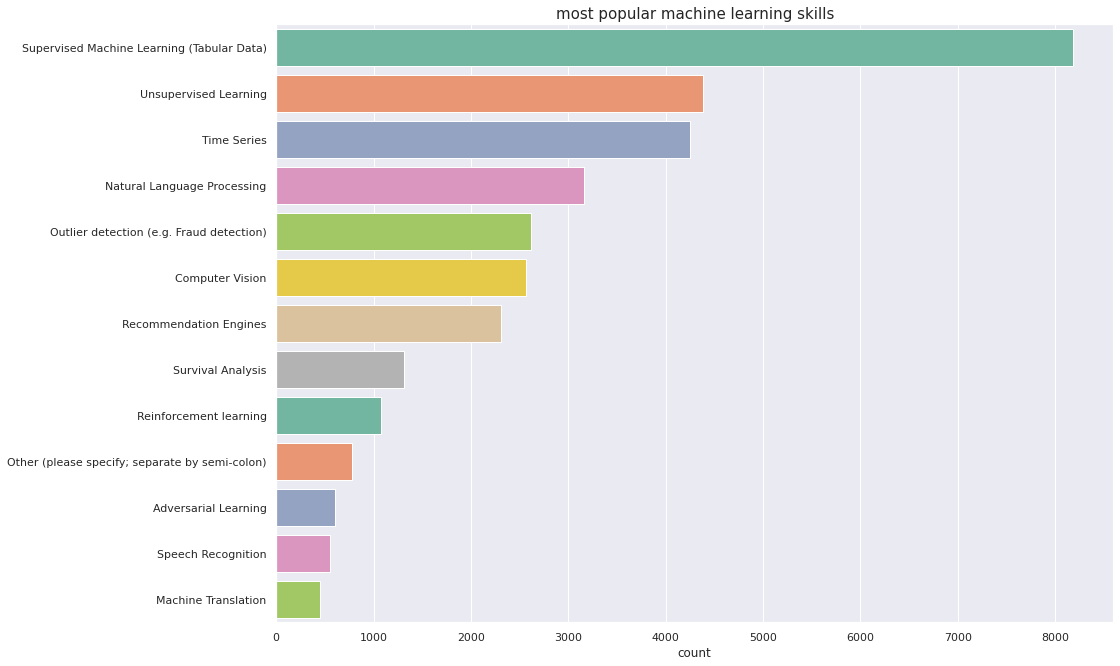

In [27]:
plt.figure(figsize=(15,11))
sns.countplot(data = pd.Series(skill_list), y = skill_list,palette='Set2',order =pd.Series(skill_list).value_counts().index)
plt.title('most popular machine learning skills',size=15)
plt.show()

In [28]:
response['MLTechniquesSelect'].head()

0    Evolutionary Approaches,Neural Networks - GANs...
1    Bayesian Techniques,Decision Trees - Gradient ...
2    Decision Trees - Random Forests,Ensemble Metho...
3    Bayesian Techniques,Decision Trees - Gradient ...
4    Bayesian Techniques,Decision Trees - Gradient ...
Name: MLTechniquesSelect, dtype: object

In [62]:
#cleaning data
techniques = response['MLTechniquesSelect'].str.split(',').dropna()
technique_list = []
for t in techniques :
  technique_list.extend(t)  # adding all of the elements in platform to the list plat_list


In [30]:
group_technique = pd.Series(technique_list).value_counts()
print(group_technique)

Logistic Regression                               8978
Decision Trees - Random Forests                   7231
Support Vector Machines (SVMs)                    5335
Decision Trees - Gradient Boosted Machines        5114
Bayesian Techniques                               4512
Neural Networks - CNNs                            4427
Ensemble Methods                                  3663
Gradient Boosting                                 2860
Neural Networks - RNNs                            2582
Hidden Markov Models HMMs                         1567
Evolutionary Approaches                           1145
Neural Networks - GANs                            1098
Other (please specify; separate by semi-colon)     864
Markov Logic Networks                              851
dtype: int64


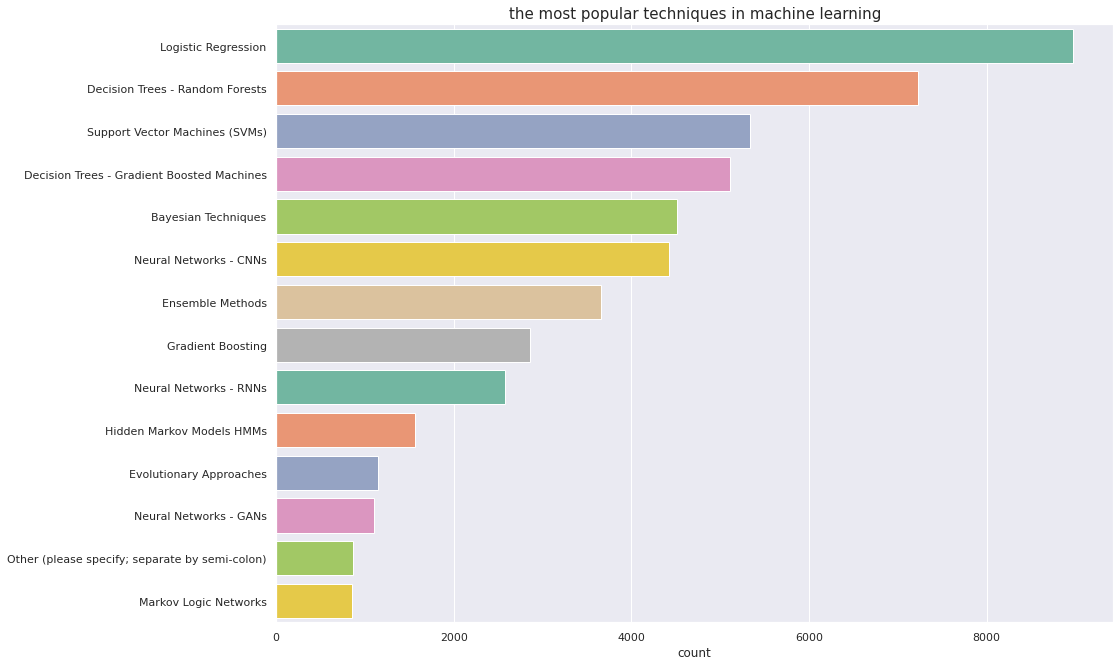

In [31]:
plt.figure(figsize=(15,11))
sns.countplot(data = pd.Series(technique_list), y = technique_list,palette='Set2',order =pd.Series(technique_list).value_counts().index)
plt.title('the most popular techniques in machine learning',size=15)
plt.show()

logistic regression is the most popular technique in machine learning and people find out Markov Logic Networks useless.

In [32]:
response['MLToolNextYearSelect'].head()

0               SAS Base
1                 Python
2    Amazon Web services
3             TensorFlow
4             TensorFlow
Name: MLToolNextYearSelect, dtype: object

In [61]:
#cleaning data
next_year = response['MLToolNextYearSelect'].str.split(',').dropna()
next_list = []
for x in next_year :
  next_list.extend(x)  # adding all of the elements in next_year to the list next_list

In [34]:
pd.Series(next_list).value_counts().iloc[:15]

TensorFlow                                        2621
Python                                            1713
R                                                  910
Spark / MLlib                                      755
Hadoop/Hive/Pig                                    417
Other                                              407
Amazon Machine Learning                            392
Jupyter notebooks                                  358
I don't plan on learning a new tool/technology     341
Google Cloud Compute                               296
Amazon Web services                                273
Julia                                              222
DataRobot                                          220
Microsoft Azure Machine Learning                   220
IBM Watson / Waton Analytics                       194
dtype: int64

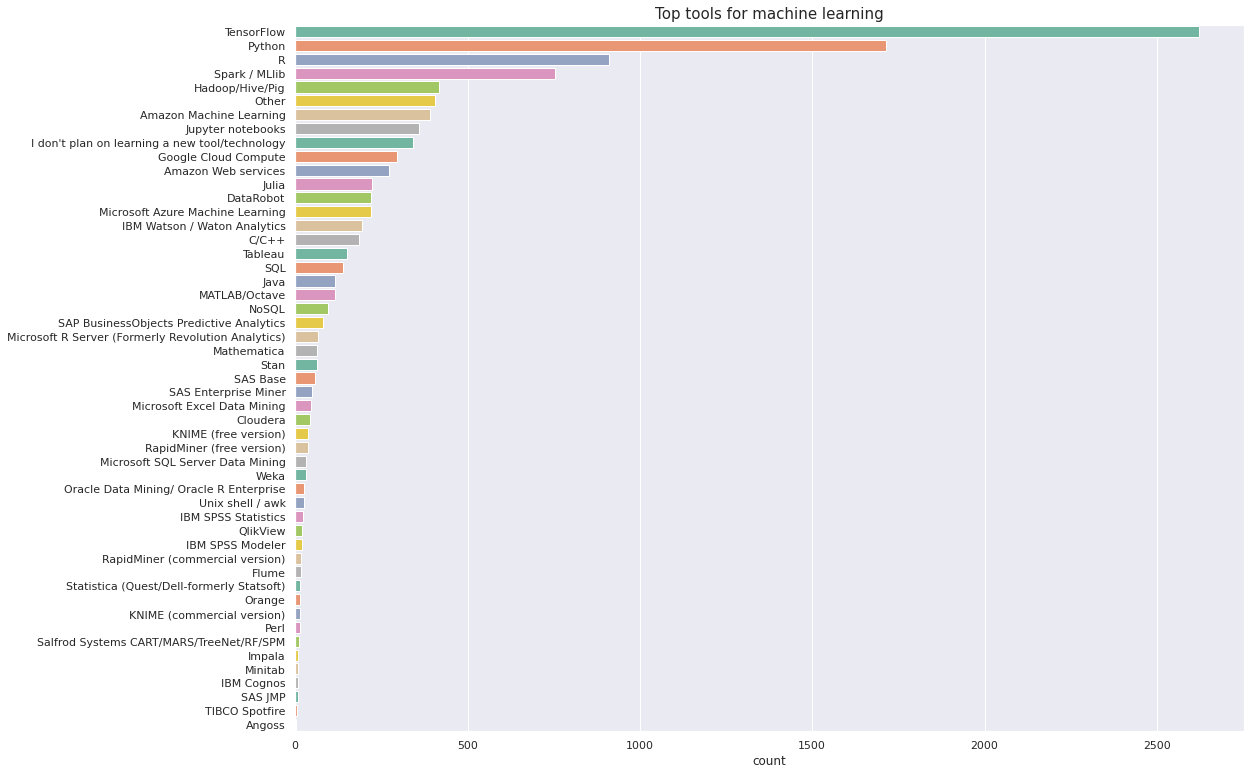

In [35]:
plt.figure(figsize=(17,13))
sns.countplot(data = pd.Series(next_list), y = next_list,palette='Set2',order =pd.Series(next_list).value_counts().index)
plt.title('Top tools for machine learning',size=15)
plt.show()

Tensorflow, python, and R are top 3 tools for machine learning.

# Best Platforms to Learn
according to this survey what are the best platforms to learn datascience?

In [36]:
response['LearningPlatformSelect'].head()

0    College/University,Conferences,Podcasts,Trade ...
1                                               Kaggle
2    Arxiv,College/University,Kaggle,Online courses...
3    Blogs,College/University,Conferences,Friends n...
4                    Arxiv,Conferences,Kaggle,Textbook
Name: LearningPlatformSelect, dtype: object

In [60]:
#cleaning data
platform = response['LearningPlatformSelect'].str.split(',').dropna()
plat_list = []
for p in platform :
  plat_list.extend(p)  # adding all of the elements in platform to the list plat_list

In [38]:
group_p = pd.Series(plat_list).value_counts()
print(group_p)

Kaggle                           6645
Online courses                   6042
Stack Overflow Q&A               5703
YouTube Videos                   5291
Personal Projects                4873
Blogs                            4828
Textbook                         4246
College/University               3397
Arxiv                            2418
Official documentation           2354
Conferences                      2217
Friends network                  1617
Tutoring/mentoring               1458
Podcasts                         1238
Non-Kaggle online communities    1169
Newsletters                      1112
Company internal community        996
Other                             518
Trade book                        337
dtype: int64


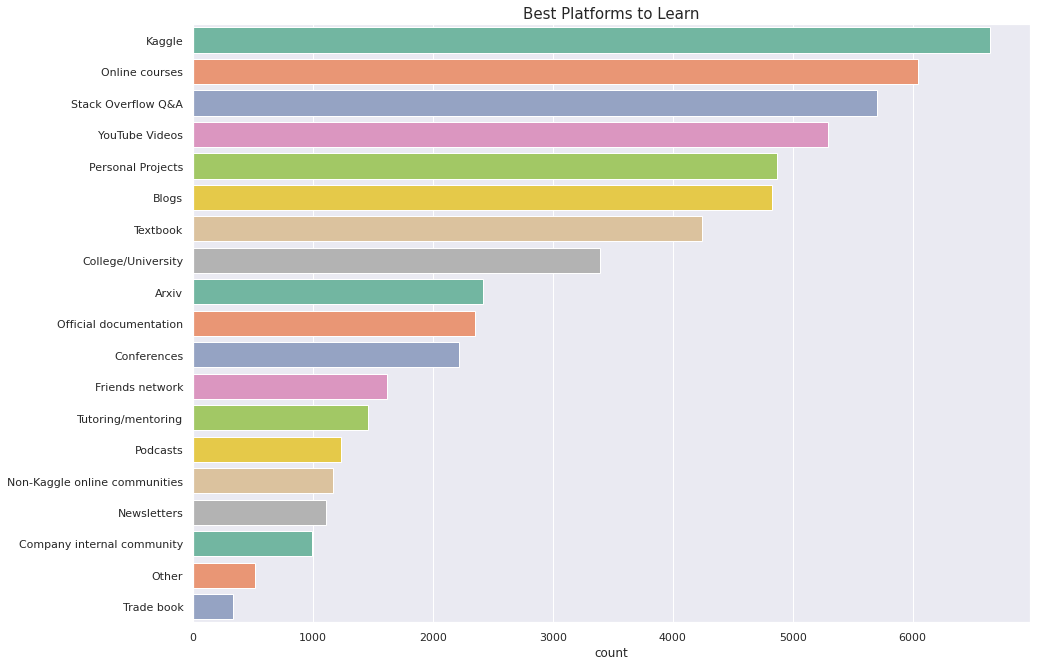

In [39]:
plt.figure(figsize=(15,11))
sns.countplot(data = pd.Series(plat_list), y = plat_list,palette='Set2',order =pd.Series(plat_list).value_counts().index)
plt.title('Best Platforms to Learn',size=15)
plt.show()

according to the above graph, the best platform to learn data science is kaggle and trade books wouldn't be useful.

Hardware Used
based on this survey what kind of hardware people use?

In [40]:
response['HardwarePersonalProjectsSelect'].head()

0                       NaN
1                       NaN
2    Basic laptop (Macbook)
3                       NaN
4                       NaN
Name: HardwarePersonalProjectsSelect, dtype: object

In [59]:
#cleaning data
hardware = response['HardwarePersonalProjectsSelect'].str.split(',').dropna()
hw_list = []
for h in hardware :
  hw_list.extend(h)  # adding all of the elements in hardware to the list hw_list


In [42]:
pd.Series(hw_list).value_counts()

Basic laptop (Macbook)                                  2246
Laptop + Cloud service (AWS                              669
 Azure                                                   669
 GCE ...)                                                669
Gaming Laptop (Laptop + CUDA capable GPU)                641
Traditional Workstation                                  527
Laptop or Workstation and local IT supported servers     445
GPU accelerated Workstation                              416
Workstation + Cloud service                              174
Other                                                    147
dtype: int64

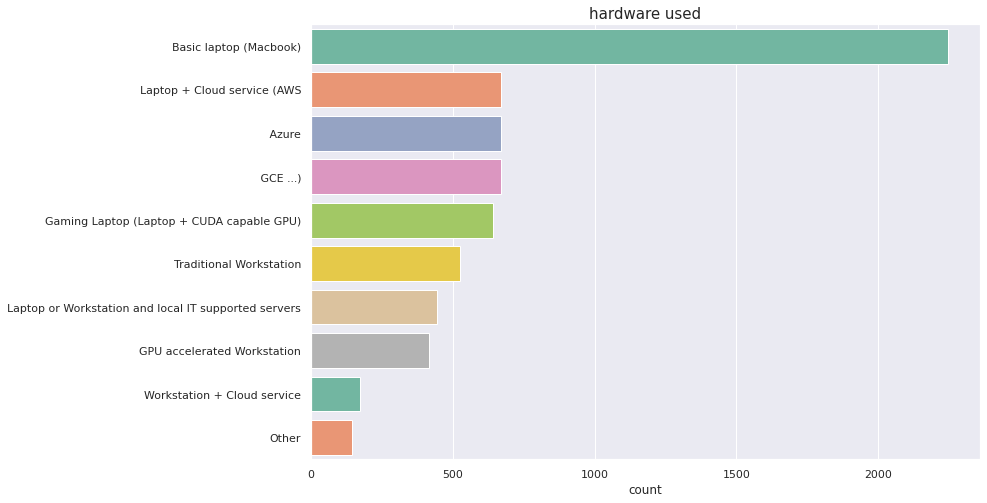

In [43]:
plt.figure(figsize=(12,8))
sns.countplot(data = pd.Series(hw_list), y = hw_list,palette='Set2',order =pd.Series(hw_list).value_counts().index)
plt.title('hardware used',size=15)
plt.show()

most people tend to use a laptop which is really popular compared to the other options.

# Where to get Datasets From?
what are the best database services that people use for their research?

In [44]:
response['PublicDatasetsSelect'].head()

0    Dataset aggregator/platform (i.e. Socrata/Kagg...
1    Dataset aggregator/platform (i.e. Socrata/Kagg...
2    Dataset aggregator/platform (i.e. Socrata/Kagg...
3            I collect my own data (e.g. web-scraping)
4                                               GitHub
Name: PublicDatasetsSelect, dtype: object

In [58]:
#cleaning data
dataset = response['PublicDatasetsSelect'].str.split(',').dropna()
data_list = []
for data in dataset :
  data_list.extend(data)  # adding all of the elements in dataset to the list data_list

In [46]:
pd.Series(data_list).value_counts()

Dataset aggregator/platform (i.e. Socrata/Kaggle Datasets/data.world/etc.)    6843
Google Search                                                                 3600
University/Non-profit research group websites                                 2873
I collect my own data (e.g. web-scraping)                                     2560
GitHub                                                                        2400
Government website                                                            2079
Other                                                                          399
dtype: int64

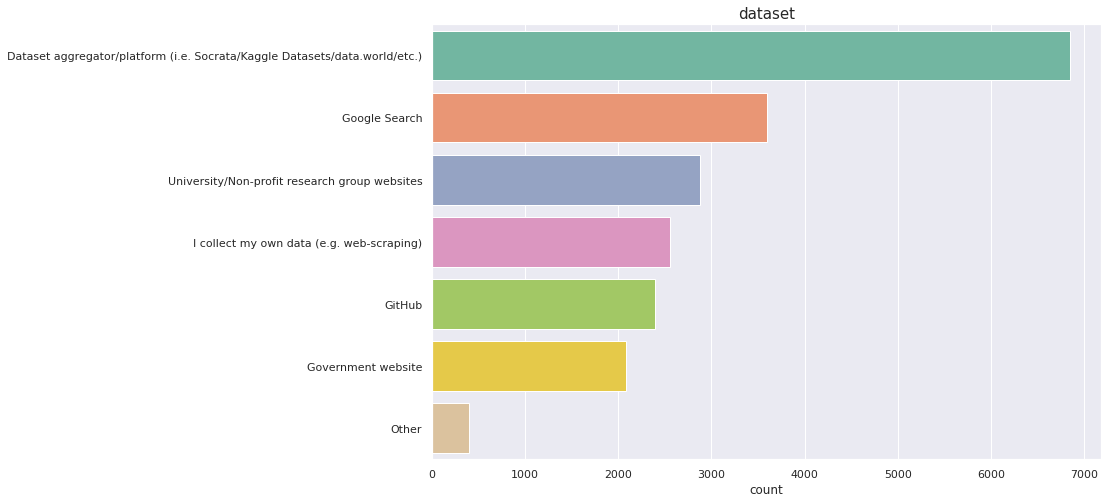

In [47]:
plt.figure(figsize=(12,8))
sns.countplot(data = pd.Series(data_list), y = data_list,palette='Set2',order =pd.Series(data_list).value_counts().index)
plt.title('dataset',size=15)
plt.show()


# Challenges in Data Science
in this survey people are asked to share their challenges during this work, find most common chanllenges in this survey and sort them.

In [48]:
response['WorkChallengesSelect'].head()

0    Company politics / Lack of management/financia...
1                                                  NaN
2                                                  NaN
3    Company politics / Lack of management/financia...
4    Company politics / Lack of management/financia...
Name: WorkChallengesSelect, dtype: object

In [57]:
#cleaning data
challenge = response['WorkChallengesSelect'].str.split(',').dropna()
challenge_list = []
for ch in challenge :
  challenge_list.extend(ch)  # adding all of the elements in dataset to the list data_list

In [50]:
pd.Series(challenge_list).value_counts()

Dirty data                                                                                            3641
Lack of data science talent in the organization                                                       3067
Company politics / Lack of management/financial support for a data science team                       2746
The lack of a clear question to be answering or a clear direction to go in with the available data    2242
Unavailability of/difficult access to data                                                            2230
Data Science results not used by business decision makers                                             1796
Explaining data science to others                                                                     1622
Privacy issues                                                                                        1460
Lack of significant domain expert input                                                               1444
Organization is small and cannot affo

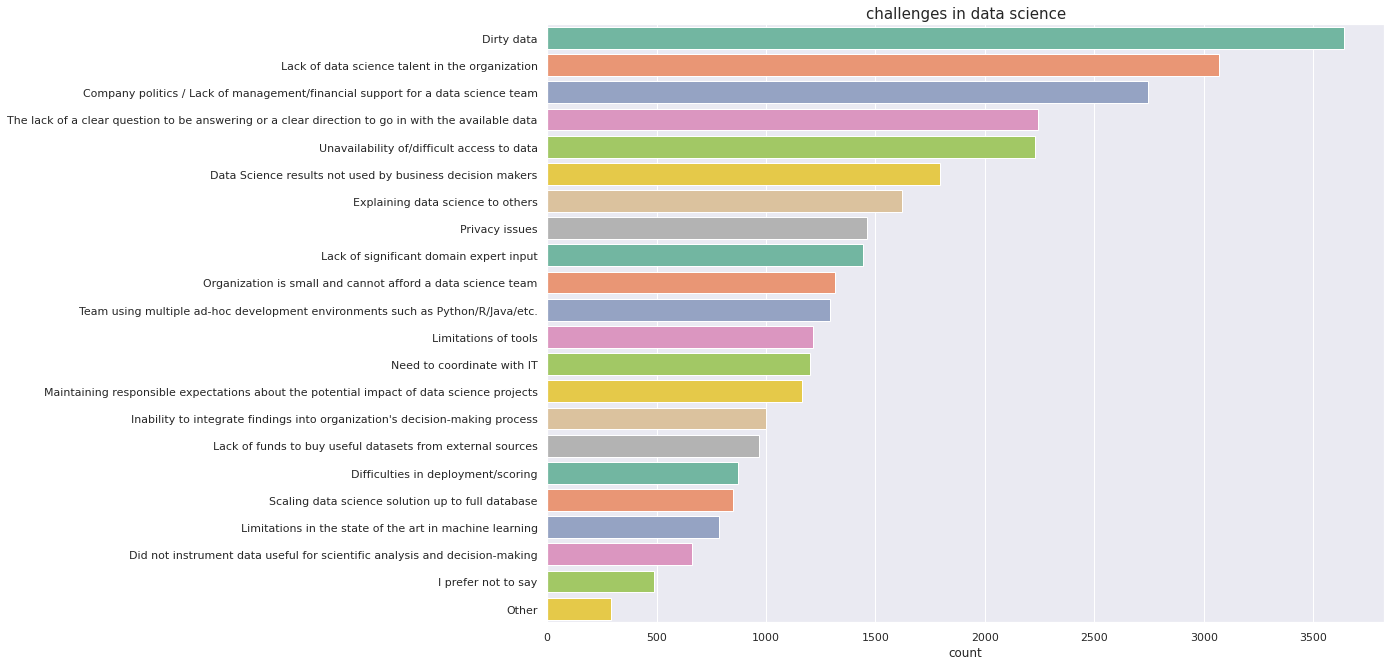

In [51]:
plt.figure(figsize=(15,11))
sns.countplot(data = pd.Series(challenge_list), y = challenge_list,palette='Set2',order =pd.Series(challenge_list).value_counts().index)
plt.title('challenges in data science',size=15)
plt.show()


it seems that dirty data is the main concern of data scientists.

# Job Satisfaction
there are lots of jobtitle in the data world like data scientist or data analyst and so on. we asked each respondent to give score to their job, so sort these jobs based on their scores.

In [52]:
response['JobSatisfaction'].head()

0                        5
1                      NaN
2                      NaN
3    10 - Highly Satisfied
4                        2
Name: JobSatisfaction, dtype: object

In [56]:
#cleaning data
satisfaction = response['JobSatisfaction'].str.split(',').dropna()
satisfied_list = []
for s in satisfaction :
  satisfied_list.extend(s)  # adding all of the elements in dataset to the list data_list

In [54]:
pd.Series(satisfied_list).value_counts()

7                          1448
8                          1427
6                           765
9                           677
5                           627
10 - Highly Satisfied       589
3                           358
4                           354
1 - Highly Dissatisfied     167
I prefer not to share       148
2                           117
dtype: int64

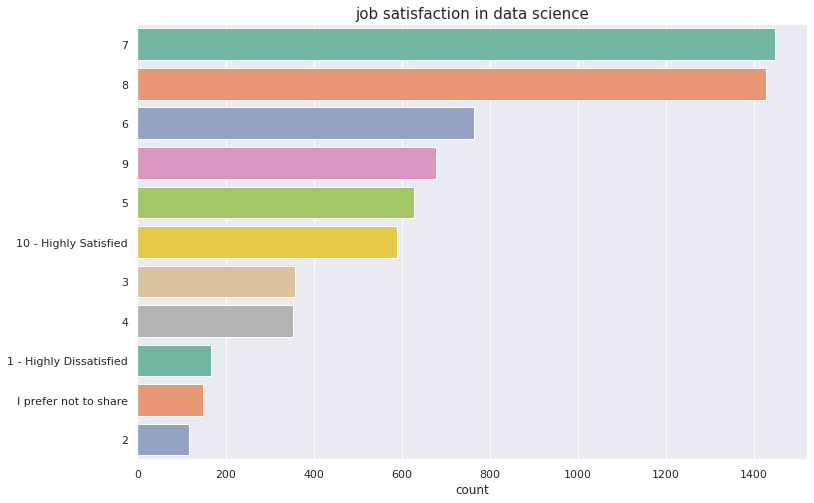

In [55]:
plt.figure(figsize=(12,8))
sns.countplot(data = pd.Series(satisfied_list), y = satisfied_list,palette='Set2',order =pd.Series(satisfied_list).value_counts().index)
plt.title('job satisfaction in data science',size=15)
plt.show()

the job satisfaction for most of the data scientists is 8 or 7 which is a high score and above the average (score 5).